In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px

#  Roof solar panels
## Research on USA roof photovoltaic panels:
## Do solar panels worth it?
## Which states in the USA are the most suitable for a sunroof?

The article was developed by **Daniel Yordanov** <br>
Softuni Username: **dakataebg**

### Abstract
The purpose of this research is to find which states in the USA are the most suitable for solar farms.
We are going to analyse [google sunroof dataset](https://www.kaggle.com/datasets/jboysen/google-project-sunroof). It contains data to help us determine if our home location is appropriate for the installation of roof solar panels.

### Introduction
As the price of installing solar has gotten less expensive, more homeowners are turning to it as a possible option for decreasing their energy bill. We want to make installing solar panels easy and understandable for anyone.

#### How does solar work?

<img src="resources/diagram-bg.jpg" />

[Image And Text Source](https://sunroof.withgoogle.com/how-it-works/)

   1. **Solar panels** <br>
   Solar panels are made up of photovoltaic (PV) cells, which convert sunlight into direct current (DC) electricity.
   
   2. **Inverter** <br>
   An inverter converts the DC electricity generated by solar panels into the alternating current (AC) electricity used in most homes.
   
   3. **Monitoring system** <br>
   A monitoring system sends information about your solar installation, including the amount of energy it generates, to your solar provider, to maintain optimal system performance.
   
   4. **Utility grid** <br>
   Your solar system is still connected to a local utility grid to provide power after sundown. Connection to the grid also allows your solar system to return to the grid any excess clean energy your system generates during the day. A utility meter measures your power consumption and solar output.
   
The most **expensive** and essential part of this system are the **solar panels**. Thus we will **focus on them**.

### Read Datasets

### 1. Read Google sunroof dataset

**Description** <br>
All features description. <br>
It is displayed because it's easier to work when you have info about the data you have. <br>
We don't need them all, so later we will drop the extra ones.

In [3]:
pd.read_csv("data/metadata.csv").style.hide(axis="index")

**Constants**

In [4]:
sunroof_data_not_needed_columns = [
        "region_name", 
        "yearly_sunlight_kwh_median",
        "yearly_sunlight_kwh_total",
        "yearly_sunlight_kwh_kw_threshold_avg",
        "yearly_sunlight_kwh_f",
        "yearly_sunlight_kwh_n",
        "yearly_sunlight_kwh_e",
        "yearly_sunlight_kwh_s",
        "yearly_sunlight_kwh_w",
        "number_of_panels_f",
        "number_of_panels_n",
        "number_of_panels_e",
        "number_of_panels_s",
        "number_of_panels_w",
        "number_of_panels_median",
        "carbon_offset_metric_tons",
        "lat_avg",
        "lng_avg",
        "lat_min",
        "lng_min", 
        "lat_max",
        "lng_max",
        "install_size_kw_buckets_json",
        "kw_total"
    ]

sunroof_data_path = "data/project-sunroof-state.csv"

**Read**

In [5]:
sunroof_data = pd.read_csv(sunroof_data_path)

sunroof_data = sunroof_data.drop(sunroof_data_not_needed_columns, axis=1)
sunroof_data = sunroof_data.set_index("state_name")

sunroof_data.head()

count_qualified  percent_covered  percent_qualified  \
state_name                                                        
Alabama              700683        74.381423          78.455420   
Alaska                27583        50.685736          37.150323   
Arizona             1638999        82.343259          91.615986   
Arkansas             322235        63.187435          75.680036   
California          7841387        87.964252          87.051870   

            number_of_panels_total  kw_median  existing_installs_count  
state_name                                                              
Alabama                   58997532       9.75                      549  
Alaska                     2179124       7.25                       83  
Arizona                  114697808      11.75                    39553  
Arkansas                  28130196       9.75                      238  
California               531022657       9.75                   328899

In [6]:
sunroof_data.dtypes

count_qualified              int64
percent_covered            float64
percent_qualified          float64
number_of_panels_total       int64
kw_median                  float64
existing_installs_count      int64
dtype: object

In [7]:
def print_dataframe_shape(dataframe):
    rows, cols = dataframe.shape
    print("Records: " +  str(rows) + ", Features: " + str(cols))

print_dataframe_shape(sunroof_data)

Records: 51, Features: 6


### 2. Read NASA daily sunlight dataset

**Info** <br>
The dataset consists of state_name and avg_daily_sunlight.
avg_daily_sunlight is in $ kJ/m^2 $.

**Constants**

In [8]:
daily_sunlight_data_path = "data/north-america-daily-Sunlight-(1979-2011).csv"

**Read**

In [9]:
daily_sunlight_data = pd.read_csv(daily_sunlight_data_path)

daily_sunlight_data = daily_sunlight_data.drop(columns=["State Code"], axis=1)

daily_sunlight_data.columns = ["state_name", "avg_daily_sunlight"]
daily_sunlight_data = daily_sunlight_data.set_index("state_name")

daily_sunlight_data.head()

avg_daily_sunlight
state_name                    
Alabama               16957.34
Arizona               19625.54
Arkansas              16498.63
California            19289.41
Colorado              17388.27

In [10]:
daily_sunlight_data.dtypes

avg_daily_sunlight    float64
dtype: object

In [11]:
print_dataframe_shape(daily_sunlight_data)

Records: 49, Features: 1


### 3. Read electric rates dataset

**Constants**

In [12]:
electric_rates_data_path = "data/electric-rates-by-state-2022.csv"

**Read**

In [13]:
electric_rates_data = pd.read_csv(electric_rates_data_path)

electric_rates_data.columns = ["state_name", "price_per_kWh"]
electric_rates_data = electric_rates_data.set_index("state_name")

electric_rates_data.head()

price_per_kWh
state_name               
Alabama            0.1428
Alaska             0.2403
Arizona            0.1321
Arkansas           0.1219
California         0.2702

In [14]:
electric_rates_data.dtypes

price_per_kWh    float64
dtype: object

In [15]:
print_dataframe_shape(electric_rates_data)

Records: 50, Features: 1


### 4. Read state abbreviation dataset

**Constants**

In [16]:
state_abbreviation_data_path = "data/state-to-abbreviation.csv"

**Read**

In [17]:
state_abbreviation_data = pd.read_csv(state_abbreviation_data_path, header=None)

state_abbreviation_data.columns = ["state_name", "abbreviation"]
state_abbreviation_data = state_abbreviation_data.set_index("state_name")

state_abbreviation_data.head()

abbreviation
state_name             
Alabama              AL
Alaska               AK
Arizona              AZ
Arkansas             AR
California           CA

In [18]:
state_abbreviation_data.dtypes

abbreviation    object
dtype: object

In [19]:
print_dataframe_shape(state_abbreviation_data)

Records: 50, Features: 1


### Percentage of Not Null observation for Google sunroof dataset
Google sunroof dataset has a few files, and not all of them have 100% Not Null values. This section is in case we choose another file.

In [20]:
def print_null_distribution_for_dataframe_features(dataframe):
    print("Feature Name: Percentage of Not Null observation\n")

    for key in dataframe.keys():
        not_null_count = dataframe[dataframe[key].notnull()].shape[0]
        all_count = dataframe.shape[0]
        percentage = not_null_count / all_count * 100
        
        print(key, ": ", round(percentage, 2))

In [21]:
print_null_distribution_for_dataframe_features(sunroof_data)

Feature Name: Percentage of Not Null observation

count_qualified :  100.0
percent_covered :  100.0
percent_qualified :  100.0
number_of_panels_total :  100.0
kw_median :  100.0
existing_installs_count :  100.0


We observed that **100%** of the data is not null.

### States count is not equal in all datasets
We can see in the read section that not all state_name features are of count 50. 
We have to observe why that is so. <br>
1. Take states separately

In [22]:
sunroof_data_states = sunroof_data.index
daily_sunlight_data_states = daily_sunlight_data.index
electric_rates_data_states = electric_rates_data.index

correct_states = state_abbreviation_data.index

2. Check **sunroof_data**

In [23]:
sunroof_data_states.symmetric_difference(correct_states)

Index(['District of Columbia'], dtype='object', name='state_name')

We need to find who contains it.

District of Columbia or Washington, D.C. or Washington is a city, not a state. Therefore we will remove it.

In [24]:
sunroof_data = sunroof_data.drop(["District of Columbia"])

Done, now sunroof_data states are correct.

3. Check **daily_sunlight_data**

In [25]:
daily_sunlight_data_states.symmetric_difference(correct_states)

Index(['Alaska', 'District of Columbia', 'Hawaii'], dtype='object', name='state_name')

We already know what to do with District of Columbia.

In [26]:
daily_sunlight_data = daily_sunlight_data.drop(["District of Columbia"])

Now we have to decide what to do with the other 2. I chose to search the values manually on the internet. <br>
I obtained the values from [this site](https://pvwatts.nrel.gov/pvwatts.php). I believe enough in the values to use them because the site is government from "NREL - National Laboratory of the U.S. Department of Energy". I took Solar Radiation which is $ kWh/m^2 $ a day. After that, I converted it to $ kJ/m^2 $ using [google](https://www.google.com/search?q=kwh+to+kj&rlz=1C1GCEU_enBG988BG988&oq=kwh+to+kj&aqs=chrome..69i57j0i22i30l5j0i10i22i30j0i22i30l3.3916j0j7&sourceid=chrome&ie=UTF-8).

In [27]:
daily_sunlight_data.loc["Hawaii"] = [18180]
daily_sunlight_data.loc["Alaska"] = [11988]

Done, now daily_sunlight_data states are correct.

4. Check **electric_rates_data**

In [28]:
electric_rates_data_states.symmetric_difference(correct_states)

Index([], dtype='object', name='state_name')

So **electric_rates_data** states are **correct**.

### Name to abbreviation 
In our dataset, we have the names of the states, but we need their abbreviature to map them. <br>
We will define a function, which merges dataframe state name to abbreviation.

In [29]:
def add_column_state_abbreviation(dataframe):
    dataframe["state_abbreviation"] = dataframe.index.map(state_abbreviation_data.abbreviation)

Now that we have function let's use it on our dataframe's.

In [30]:
add_column_state_abbreviation(sunroof_data)
add_column_state_abbreviation(daily_sunlight_data)
add_column_state_abbreviation(electric_rates_data)

### States sunlight map

Let's compare Google dataset's kw_median and NASA's avg_daily_sunlight. <br>
Google's feature is "kW of solar potential for the median building in that region (assuming 250 watts per panel)", while NASA's is the actual quantity of sunlight hitting the earth.

In [31]:
def show_choropleth(dataframe, location_col_name, data_col, title, color_theme="ylorrd"):
    fig = px.choropleth(dataframe,
                    locations=location_col_name, 
                    locationmode="USA-states", 
                    scope="usa",
                    color=data_col,
                    color_continuous_scale=color_theme,
                    title=title)
    fig.show()

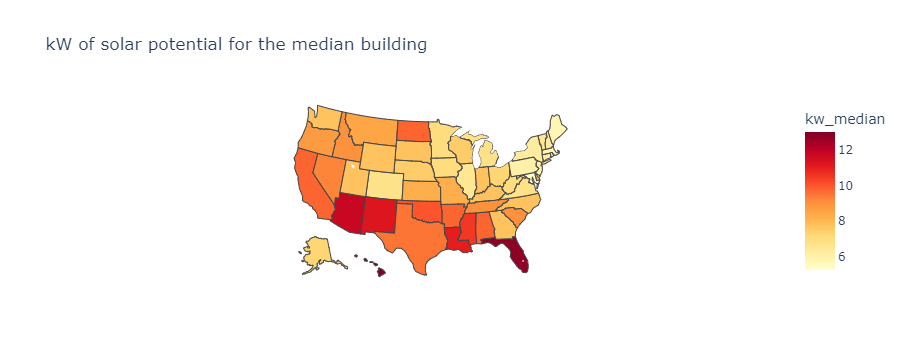

In [32]:
show_choropleth(
    dataframe = sunroof_data,
    location_col_name = "state_abbreviation",
    data_col = "kw_median",
    title = "kW of solar potential for the median building")

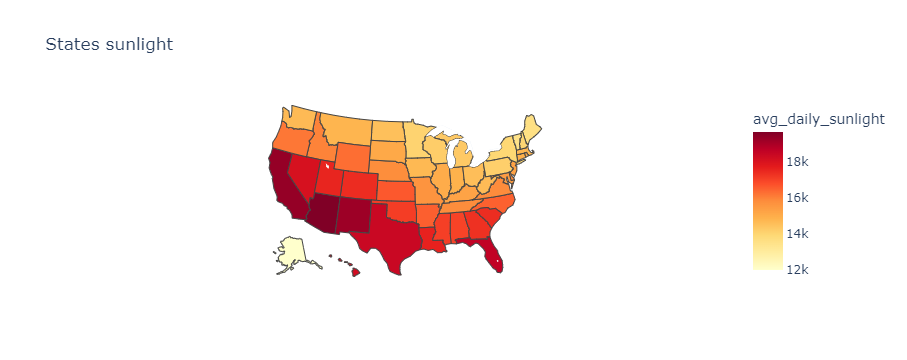

In [33]:
show_choropleth(
    dataframe = daily_sunlight_data,
    location_col_name = "state_abbreviation",
    data_col = "avg_daily_sunlight",
    title = "States sunlight")

We can see that the **southern states** have much more potential and the sun data confirms it.

### What percentage of buildings in Google Maps are covered by Project Sunroof Dataset

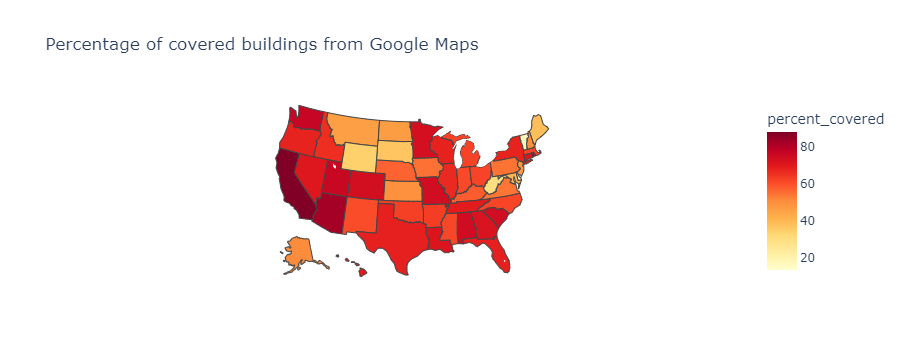

In [34]:
show_choropleth(
    dataframe = sunroof_data,
    location_col_name = "state_abbreviation",
    data_col = "percent_covered",
    title = "Percentage of covered buildings from Google Maps")

In [35]:
print("Mean:", round(sunroof_data.percent_covered.mean(), 2), "%")

Mean: 60.05 %


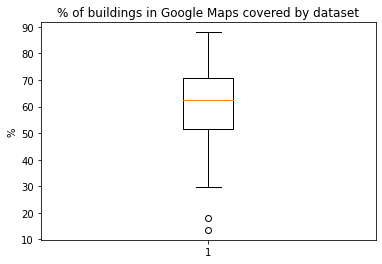

In [36]:
plt.boxplot(sunroof_data.percent_covered)
plt.ylabel("%")
plt.title("% of buildings in Google Maps covered by dataset")
plt.show()

That's great we can see that average of **60%** is covered, which is plenty.

### States percentage of qualified for solar rooftop and percentage of used from the qualified
Let's see how many out of the qualified roofs are actually used.

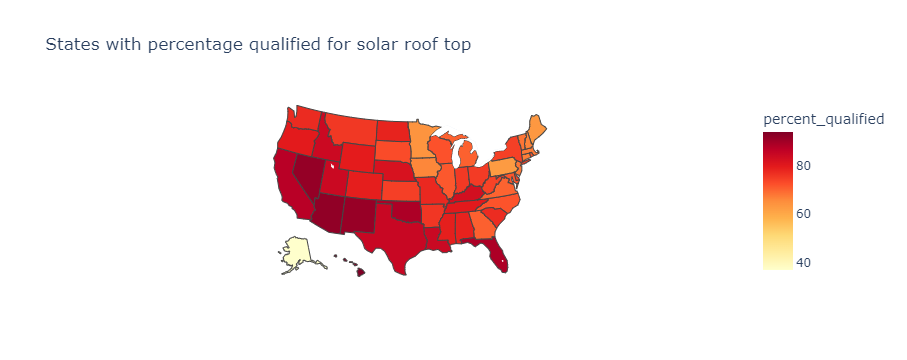

In [37]:
show_choropleth(
    dataframe = sunroof_data,
    location_col_name = "state_abbreviation",
    data_col = "percent_qualified",
    title = "States with percentage qualified for solar roof top")

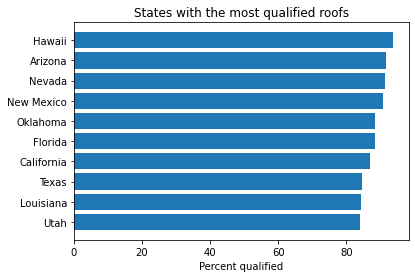

In [85]:
top_states_most_qualified_roofs = sunroof_data["percent_qualified"].nlargest(10)
x = top_states_most_qualified_roofs.values
y = top_states_most_qualified_roofs.index

plt.barh(y, x)
plt.xlabel("Percent qualified")
plt.title("States with the most qualified roofs")

plt.gca().invert_yaxis()
plt.show()

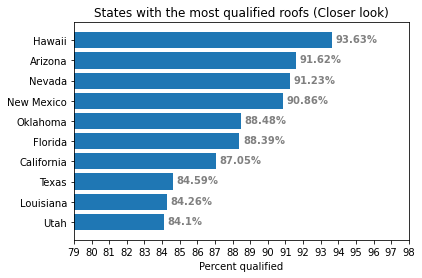

In [87]:
top_states_most_qualified_roofs = sunroof_data["percent_qualified"].nlargest(10)
x = top_states_most_qualified_roofs.values
y = top_states_most_qualified_roofs.index

difference = 5

min_x = round(x.min())
max_x = round(x.max())
x = x - min_x + difference

plt.barh(y, x)
plt.xlabel("Percent qualified")
plt.title("States with the most qualified roofs (Closer look)")

plt.xticks(
    ticks = np.arange(0, max_x - min_x + difference * 2),
    labels = np.arange(min_x - difference, max_x + difference))

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width() + 0.2,
             i.get_y() + 0.5,
             str(round((i.get_width() + min_x - difference), 2)) + "%",
             fontsize=10,
             fontweight="bold",
             color="grey")

plt.gca().invert_yaxis()
plt.show()

In [88]:
print(round(sunroof_data.percent_qualified.mean(), 2), "%")

75.77 %


In [89]:
print(round(sunroof_data.percent_qualified.max(), 2), "%")

93.63 %


That is interesting, with an average of 75% of the qualified and a max of 93%. <br>
We can say that most of the roofs are **suitable**.

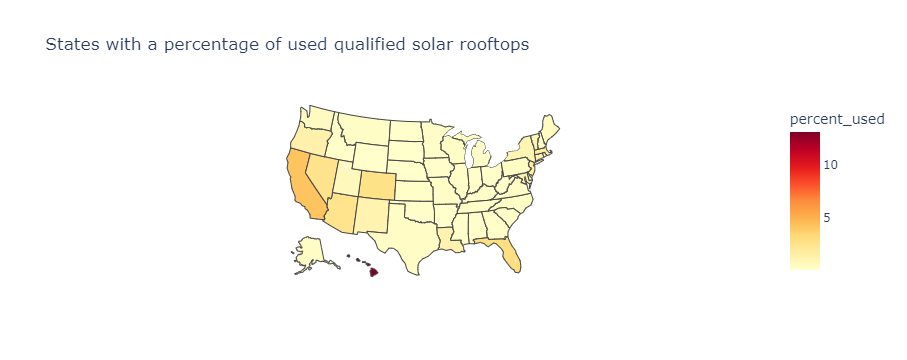

In [40]:
sunroof_data["percent_used"] = sunroof_data.existing_installs_count / sunroof_data.count_qualified * 100

show_choropleth(
    dataframe = sunroof_data,
    location_col_name = "state_abbreviation",
    data_col = "percent_used",
    title = "States with a percentage of used qualified solar rooftops")

So it turns out that most of there is a significantly **small number of solar roofs** compared to the capacities of each state.

### Is it worthy installing solar panel?
How long will it take you to get your money's worth back? <br>
- Average electricity per month: about 893 kWh => 30 kWh per day <br>
- How much electricity does a 1 kW solar panel system produce?  <br>
A 1 kW system of solar panels can generate around 850 kWh of electricity each year or 2.33 kWh a day. <br>

=> So we will need 13 kW solar panel. <br>
Solar panels cost:
- 13 kW solar panel would cost around $25,000. 
<br><br>
Let's see electricity prices distribution:

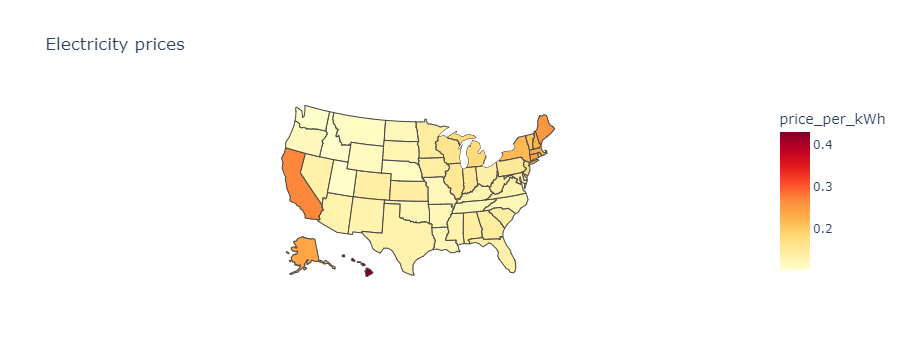

In [41]:
show_choropleth(
    dataframe = electric_rates_data,
    location_col_name = "state_abbreviation",
    data_col = "price_per_kWh",
    title = "Electricity prices")

We can see that Hawaii is a prety big outlier. Let's see the map again but without it.

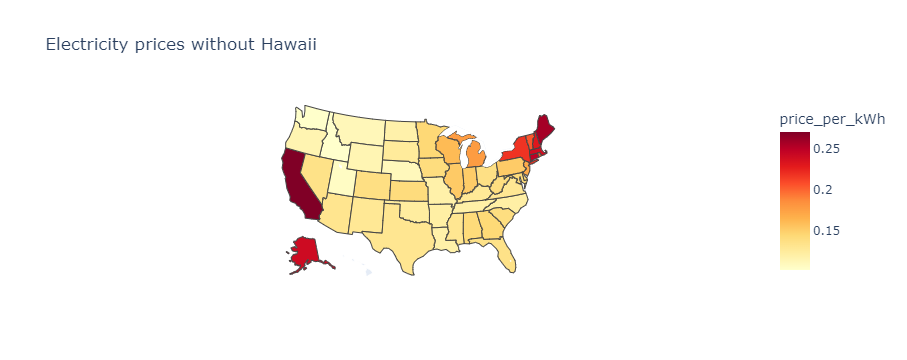

In [42]:
show_choropleth(
    dataframe = electric_rates_data[electric_rates_data.index != "Hawaii"],
    location_col_name = "state_abbreviation",
    data_col = "price_per_kWh",
    title = "Electricity prices without Hawaii")

Now we can see better the other states.
<br><br>
We saw the prices now let's see how long it will take to get our money back.

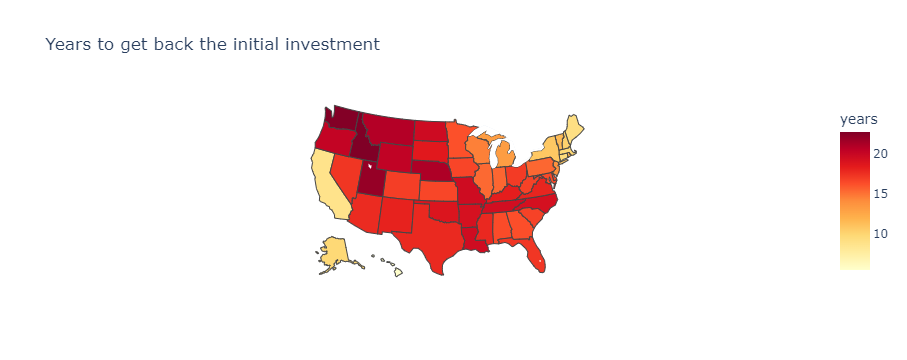

In [44]:
solar_panels_cost = 25000
electry_for_month = 893
months_in_year = 12

electric_rates_data["years"] = solar_panels_cost / (electry_for_month * electric_rates_data["price_per_kWh"]) / months_in_year

show_choropleth(
    dataframe = electric_rates_data,
    location_col_name = "state_abbreviation",
    data_col = "years",
    title = "Years to get back the initial investment")

Top 10 states with fastest returns:

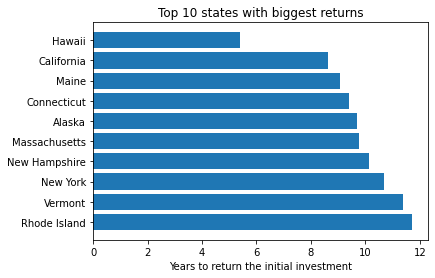

In [45]:
top_states_fastest_returns = electric_rates_data["years"].nsmallest(10)
x = top_states_fastest_returns.values
y = top_states_fastest_returns.index

plt.barh(y, x)
plt.xlabel("Years to return the initial investment")
plt.title("Top 10 states with biggest returns")

plt.gca().invert_yaxis()
plt.show()

The fewer years it takes, the better it is.

### Conclusion

If we choose where to install solar panels, we need to look at the warmer states because the warmer it is, the sunnier it is.<br>
If we want to decide whether it is worth installing solar panels on our house roof, we need to check how many years it would take us to get our money's worth back and if the state we live in is sunny enough. For example, if we live in Alaska, our solar panels won't produce their maximum capacity because of the low levels of sun.

### References

Google sun roof dataset: [site](https://www.kaggle.com/datasets/jboysen/google-project-sunroof)

Nasa avgerage sunlight dataset: [site](http://wonder.cdc.gov/NASA-INSOLAR.html)

Electric rates by state dataset: [site](https://www.saveonenergy.com/electricity-rates/#:~:text=The%20average%20residential%20electricity%20rate,kilowatt%2Dhour%20(kWh).&text=The%20average%20electric%20price%20a,depending%20on%20where%20you%20live.)

How much electricity does an American home use: [site](https://www.eia.gov/tools/faqs/faq.php?id=97&t=3)

How much do solar panels cost: [site](https://solar-estimate.ecowatch.com/local-solar-calculator/?project=&locp=1001457&loci=9015800&kw=cost%20of%20solar&var1=16741892074&var2=137949995191&var3=c&cmp=oh&kwd=&gclid=Cj0KCQjwrs2XBhDjARIsAHVymmTqizFRkLHpkFanvHTQzI2YhWYE9O0N7qeodr0Vy7CG3mMkxBurvPYaAv4LEALw_wcB)

How much electricity does a 1 kW solar panel system produce: [site](https://www.yesenergysolutions.co.uk/advice/how-much-energy-solar-panels-produce-home#:~:text=is%20explained%20below.-,How%20much%20electricity%20does%20a%201%20kW%20solar%20panel%20system,kWh%20of%20electricity%20each%20year.)